In [1]:
import sys
sys.path.insert(0, "../../torchdriveenv")

In [2]:
import cv2
import io
import os
import pickle
import random
import torch
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

In [3]:
# def sample_evaluation_cases(data_dir, diffusion_keys, condition_keys, constraints=None):
#     super().__init__()
#     data_dir = data_dir

#     data = []

#     def get_value(key, step_data):
#         if key == "obs_birdview":
#             return step_data.obs_birdview.squeeze()
#         if key == "recurrent_state":
#             return torch.Tensor(step_data.recurrent_states[0]).squeeze() # .cuda()
#         if key == "action":
#             return step_data.ego_action.squeeze()

#     for file in os.listdir(data_dir):
#         file_path = os.path.join(data_dir, file)
#         with open(file_path, "rb") as f:
#             episode_data = pickle.load(f)
#         if (constraints is not None) and ("location" in constraints) and (episode_data.location not in constraints["location"]):
#             continue
#         for step_data in episode_data.step_data:
#             if len(diffusion_keys) == 1:
#                 x = get_value(diffusion_keys[0], step_data)
#             else:
#                 x = "_".join([get_value(key, step_data) for key in diffusion_keys])
#             if condition_keys is None:
#                 s = None
#             elif len(condition_keys) == 1:
#                 s = get_value(condition_keys[0], step_data)
#             else:
#                 s = "_".join([get_value(key, step_data) for key in condition_keys])
#             data.append((x, s))

In [4]:
# def sample_evaluation_cases(data_dir, n_samples=10, constraints=None):
#     super().__init__()
#     data_dir = data_dir

#     data = []

#     for file in os.listdir(data_dir):
#         file_path = os.path.join(data_dir, file)
#         with open(file_path, "rb") as f:
#             episode_data = pickle.load(f)
#         if (constraints is not None) and ("location" in constraints) and (episode_data.location not in constraints["location"]):
#             continue
#         for step_data in episode_data.step_data:
#             data.append((x, s))

In [5]:
def get_value(key, step_data):
    if key == "obs_birdview":
        return step_data.obs_birdview.squeeze()
    if key == "recurrent_state":
        return torch.Tensor(step_data.recurrent_states[0]).squeeze() # .cuda()
    if key == "action":
        return step_data.ego_action.squeeze()

In [6]:
def to_video(pil_images, fps=10):

    # Convert PIL images to numpy arrays
    frames = [np.array(img) for img in pil_images]

    # Get frame size (height, width)
    height, width, layers = frames[0].shape
    size = (width, height)

    # Use in-memory buffer for video
    output_buffer = io.BytesIO()

    # Define video writer using OpenCV and FFMPEG with memory buffer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter("output.mp4",
                                    fourcc, fps, size)

    for frame in frames:
        bgr_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        video_writer.write(bgr_frame)

    video_writer.release()

    output_buffer.seek(0)  # Reset buffer position to the start
    return output_buffer

In [7]:
def to_image(plt):
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=50)
    buf.seek(0)
    plt.close()
    return Image.open(buf)


def plot_samples(x):
    x = x.cpu().numpy()
    plt.scatter(x[1], x[0])
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    return to_image(plt)

In [8]:
def visualize_episode(file_path):
    obs_birdviews = []
    actions = []
    action_images = []
    with open(file_path, "rb") as f:
        episode_data = pickle.load(f)
    print(episode_data)
    for step_data in episode_data.step_data:
        obs_birdviews.append(get_value("obs_birdview", step_data))
        action = get_value("action", step_data)
        actions.append(action)
        action_images.append(plot_samples(action)) # .append(get_value("action", step_data))
        
    return [Image.fromarray(img.astype(np.uint8).transpose(1, 2, 0), 'RGB') for img in obs_birdviews], \
            action_images, actions

In [9]:
data_dir = "../data/ppo_bad_policy_single"
file_paths = [os.path.join(data_dir, file) for file in os.listdir(data_dir)]
# file_paths

In [10]:
file_path = random.choice(file_paths)
file_path 

'../data/ppo_bad_policy_single/episode_115_42056.pkl'

In [11]:
# file_path = '../data/waypoint_graph_no_rendering_test/episode_0_60967.pkl'

In [12]:
!pwd

/home/kezhang/work/fall_2024/energy-based-diffusion-model/notebooks


In [13]:
# !ls -l ../data/itra_data/episode_2367_13523.pkl

In [14]:
obs_images, action_images, actions = visualize_episode(file_path)

/home/kezhang/work/stochastic-critic/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Commercial access denied and fallback to check for academic access.
/home/kezhang/work/stochastic-critic/.venv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via t

EpisodeData(location='carla_Town03', step_data=[StepData(obs_birdview=array([[[[[  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0., 128., ...,   0.,   0.,   0.]],

         [[  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.]],

         [[  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          ...,
          [  0.,   0.,   0., ...,   0.,   0.,   0.],
          [  0.,   0.,   0., ...,

In [15]:
to_video(obs_images)

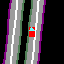

In [16]:
obs_images[0]

In [17]:
actions

[tensor([ 0.9723, -0.3000], device='cuda:0'),
 tensor([ 0.0033, -0.3000], device='cuda:0'),
 tensor([-0.3603, -0.3000], device='cuda:0'),
 tensor([0.4284, 0.3000], device='cuda:0'),
 tensor([-1.0000,  0.3000], device='cuda:0'),
 tensor([-0.8683,  0.0993], device='cuda:0'),
 tensor([0.6405, 0.3000], device='cuda:0'),
 tensor([-0.6101, -0.3000], device='cuda:0'),
 tensor([-1.0000, -0.0118], device='cuda:0'),
 tensor([-0.8710, -0.3000], device='cuda:0'),
 tensor([1.0000, 0.2904], device='cuda:0'),
 tensor([-0.2431,  0.3000], device='cuda:0'),
 tensor([-0.0049,  0.3000], device='cuda:0'),
 tensor([ 0.5577, -0.3000], device='cuda:0'),
 tensor([-0.5420, -0.3000], device='cuda:0'),
 tensor([ 0.8034, -0.3000], device='cuda:0'),
 tensor([0.4585, 0.3000], device='cuda:0'),
 tensor([-0.5771,  0.3000], device='cuda:0'),
 tensor([-1.0000, -0.3000], device='cuda:0'),
 tensor([ 1.0000, -0.3000], device='cuda:0'),
 tensor([-1.0000,  0.0572], device='cuda:0'),
 tensor([0.8727, 0.3000], device='cuda:0')

In [18]:
np.argmax(torch.stack(actions).cpu(), axis=0)

tensor([10,  3])

In [19]:
np.argmin(torch.stack(actions).cpu(), axis=0)

tensor([4, 0])

In [20]:
actions[11]

tensor([-0.2431,  0.3000], device='cuda:0')

In [21]:
# actions[97]

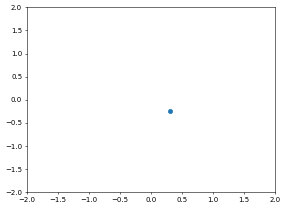

In [22]:
action_images[11]

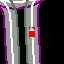

In [23]:
obs_images[11]

In [24]:
obs_images[0].save('test_obs.gif',
                   save_all=True, append_images=obs_images[1:], optimize=False, duration=40, loop=0)

In [25]:
action_images[0].save('test_action.gif',
                      save_all=True, append_images=action_images[1:], optimize=False, duration=40, loop=0)